Saving image 6 to image 6


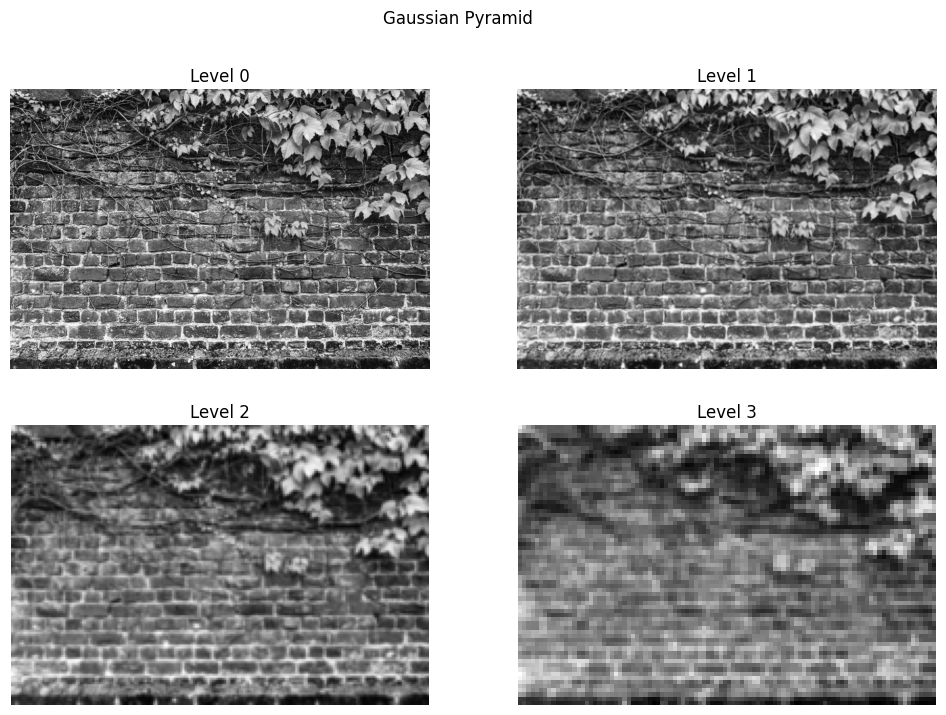

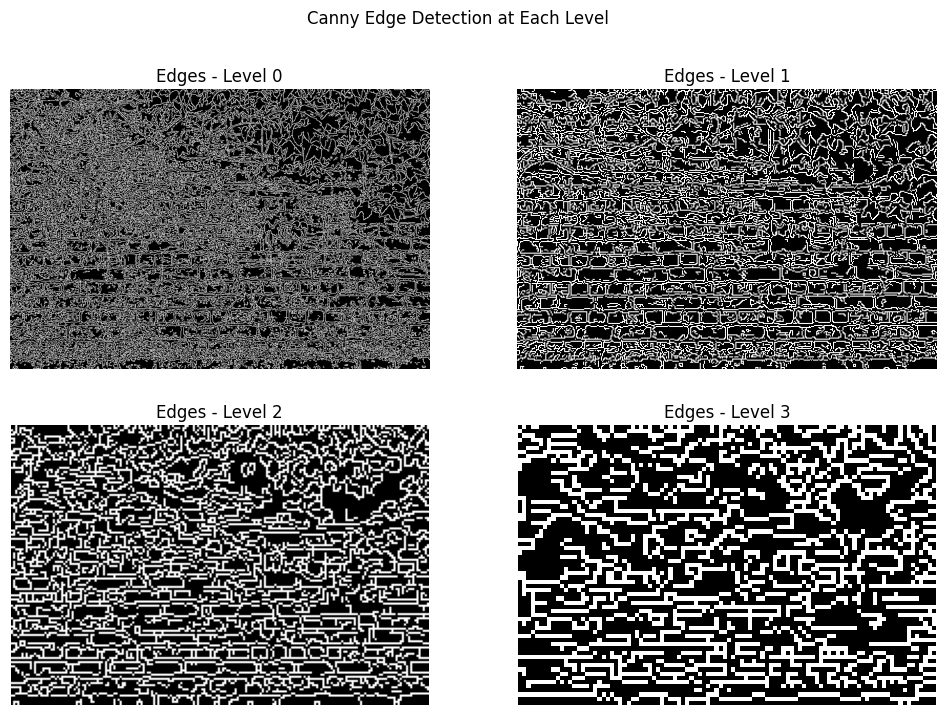

Variance at Each Level:
Level 0: 3416.95
Level 1: 2340.78
Level 2: 1713.42
Level 3: 1153.09


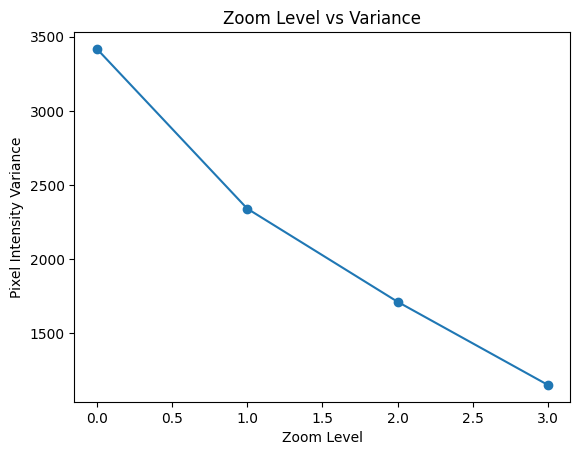

In [1]:
# Install & Import
!pip install opencv-python -q

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Read & Convert to Grayscale
img = cv2.imread(image_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussian Pyramid
L0 = img_gray
L1 = cv2.pyrDown(L0)
L2 = cv2.pyrDown(L1)
L3 = cv2.pyrDown(L2)

levels = [L0, L1, L2, L3]

# Canny Edge Detection
edges = [cv2.Canny(level, 100, 200) for level in levels]

# Compute Variance
variances = [np.var(level) for level in levels]

# Display Pyramid
plt.figure(figsize=(12,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(levels[i], cmap='gray')
    plt.title(f"Level {i}")
    plt.axis('off')
plt.suptitle("Gaussian Pyramid")
plt.show()

# Display Edges
plt.figure(figsize=(12,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(edges[i], cmap='gray')
    plt.title(f"Edges - Level {i}")
    plt.axis('off')
plt.suptitle("Canny Edge Detection at Each Level")
plt.show()

# Print Variance
print("Variance at Each Level:")
for i, var in enumerate(variances):
    print(f"Level {i}: {var:.2f}")

# Plot Variance
plt.plot([0,1,2,3], variances, marker='o')
plt.xlabel("Zoom Level")
plt.ylabel("Pixel Intensity Variance")
plt.title("Zoom Level vs Variance")
plt.show()


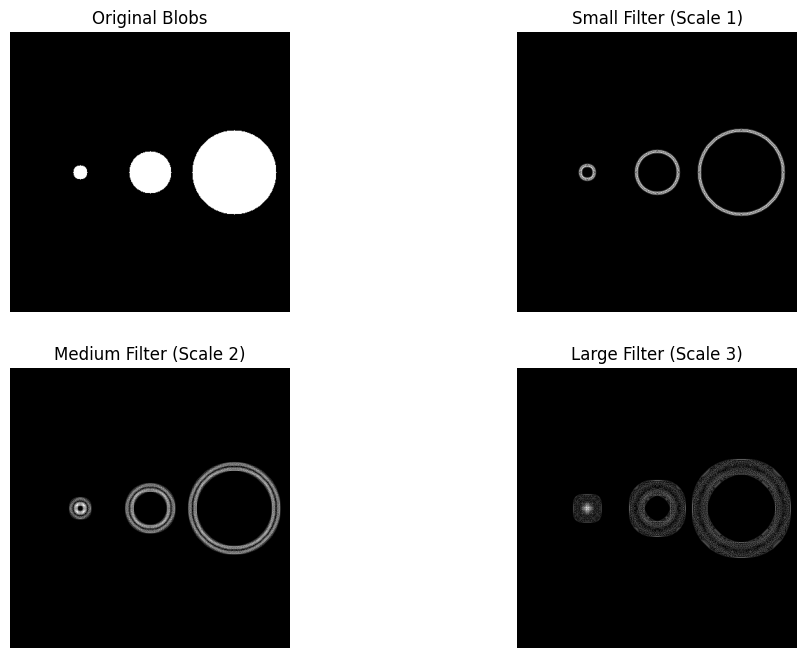

In [2]:
# Install & Import
!pip install opencv-python -q

import cv2
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Create Synthetic Blob Image
# -----------------------------
img = np.zeros((400, 400), dtype=np.uint8)

# Draw blobs of different sizes
cv2.circle(img, (100, 200), 10, 255, -1)   # Small blob
cv2.circle(img, (200, 200), 30, 255, -1)   # Medium blob
cv2.circle(img, (320, 200), 60, 255, -1)   # Large blob

# -----------------------------
# Step 2: Apply Laplacian of Gaussian at Different Scales
# -----------------------------

def apply_log(image, ksize, sigma):
    blurred = cv2.GaussianBlur(image, (ksize, ksize), sigma)
    log = cv2.Laplacian(blurred, cv2.CV_64F)
    return np.abs(log)

log_small = apply_log(img, 5, 1)     # Small scale filter
log_medium = apply_log(img, 11, 3)   # Medium scale filter
log_large = apply_log(img, 21, 6)    # Large scale filter

# -----------------------------
# Step 3: Display Results
# -----------------------------
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Blobs")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(log_small, cmap='gray')
plt.title("Small Filter (Scale 1)")
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(log_medium, cmap='gray')
plt.title("Medium Filter (Scale 2)")
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(log_large, cmap='gray')
plt.title("Large Filter (Scale 3)")
plt.axis('off')

plt.show()


Upload Image 1 (original)


Saving image 7.jpg to image 7.jpg
Upload Image 2 (scaled/rotated)


Saving image 6 to image 6 (1)
Number of matches: 6


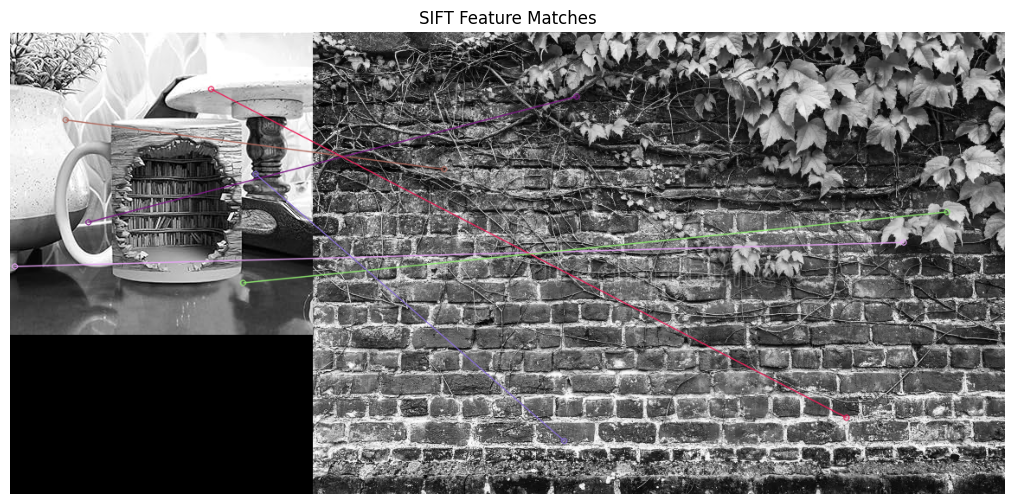

In [3]:
!pip install opencv-python opencv-contrib-python -q
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# -----------------------------
# Upload Two Images
# -----------------------------
print("Upload Image 1 (original)")
uploaded1 = files.upload()
img1_path = list(uploaded1.keys())[0]

print("Upload Image 2 (scaled/rotated)")
uploaded2 = files.upload()
img2_path = list(uploaded2.keys())[0]

# Read Images in Grayscale
img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

# -----------------------------
# Step 3: Detect SIFT Features
# -----------------------------
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# -----------------------------
# Step 4: Match Features
# -----------------------------
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test (David Lowe)
good_matches = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good_matches.append(m)

print(f"Number of matches: {len(good_matches)}")

# -----------------------------
# Step 5: Draw Matches
# -----------------------------
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)

plt.figure(figsize=(14,6))
plt.imshow(img_matches)
plt.axis('off')
plt.title("SIFT Feature Matches")
plt.show()


Saving image 7.jpg to image 7 (1).jpg
Level 0 → Mean: 146.62, Variance: 6238.95
Level 1 → Mean: 146.75, Variance: 5705.00
Level 2 → Mean: 146.99, Variance: 5369.92
Level 3 → Mean: 147.54, Variance: 5000.79
Level 4 → Mean: 148.67, Variance: 4522.38


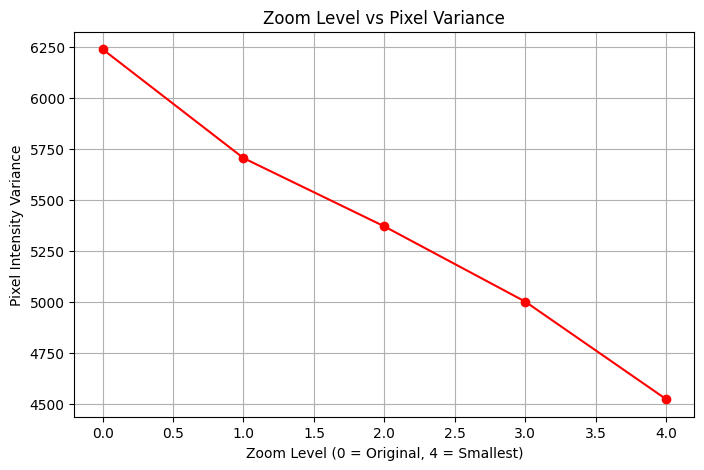

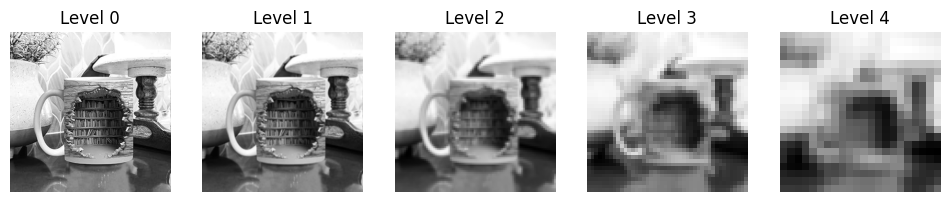

In [4]:
!pip install opencv-python -q

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# -----------------------------
# Upload Original High-Res Image
# -----------------------------
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

img_orig = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# -----------------------------
# Step 1: Create 5 Zoom Levels
# -----------------------------
levels = [img_orig]
for i in range(1,5):
    prev = levels[-1]
    down = cv2.pyrDown(prev)  # downsample by half
    levels.append(down)

# -----------------------------
# Step 2: Compute Mean & Variance
# -----------------------------
means = [np.mean(l.flatten()) for l in levels]
variances = [np.var(l.flatten()) for l in levels]

for i, (m, v) in enumerate(zip(means, variances)):
    print(f"Level {i} → Mean: {m:.2f}, Variance: {v:.2f}")

# -----------------------------
# Step 3: Plot Variance vs Zoom Level
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(range(5), variances, marker='o', color='red')
plt.xlabel("Zoom Level (0 = Original, 4 = Smallest)")
plt.ylabel("Pixel Intensity Variance")
plt.title("Zoom Level vs Pixel Variance")
plt.grid(True)
plt.show()

# -----------------------------
# Optional: Display All Levels
# -----------------------------
plt.figure(figsize=(12,6))
for i, lvl in enumerate(levels):
    plt.subplot(1,5,i+1)
    plt.imshow(lvl, cmap='gray')
    plt.title(f"Level {i}")
    plt.axis('off')
plt.show()
